Epoch 1/30


C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1901/1901 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2807.9099 - mae: 35.6446 - val_loss: 732.8226 - val_mae: 22.3537
Epoch 2/30
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 694.1903 - mae: 20.3924 - val_loss: 4240.2461 - val_mae: 61.6901
Epoch 3/30
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 516.0555 - mae: 17.2146 - val_loss: 5178.4033 - val_mae: 68.7160
Epoch 4/30
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 474.0694 - mae: 16.3604 - val_loss: 6581.6489 - val_mae: 78.1285
Epoch 5/30
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 458.7159 - mae: 15.9911 - val_loss: 6810.9888 - val_mae: 79.4482
Epoch 6/30
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 447.0832 - mae: 15.7118 - val_loss: 6755.6582 - val_mae: 79.1171
Epoch 7/30
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 445.0296 - mae: 15.6265 - val_loss: 6176.0425 - val_mae: 75.4656
Epoch 8/30
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 440.3686 - mae: 15.5740 - val_loss: 6963.2871 - val_mae: 80.

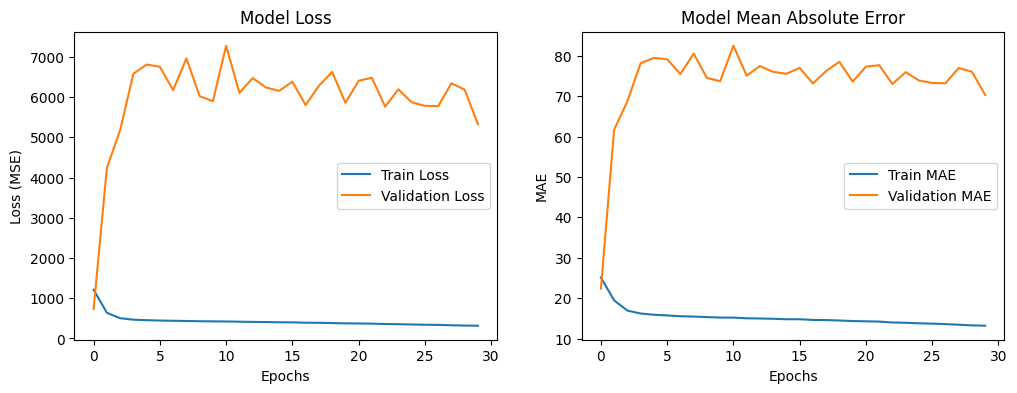

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load the IPL dataset
data = pd.read_csv('ipl_data.csv')

# Step 2: Data Preprocessing

# Drop unnecessary columns, if any, to focus on essential features
data = data.drop(['mid', 'date', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1)

# Encode categorical columns
label_encoder = LabelEncoder()
data['venue'] = label_encoder.fit_transform(data['venue'])
data['bat_team'] = label_encoder.fit_transform(data['bat_team'])
data['bowl_team'] = label_encoder.fit_transform(data['bowl_team'])

# Fill missing values if any
data.fillna(0, inplace=True)

# Separate features and target using 'total' as the target column
X = data.drop('total', axis=1)  # Features
y = data['total']              # Target

# Standardize numerical columns to improve CNN training performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for CNN input (samples, timesteps, features)
X = np.expand_dims(X, axis=2)

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the CNN model with adjusted pooling layers
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Step 5: Compile the model with a regression-appropriate loss function
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

# Step 8: Plot loss and accuracy curves to understand model performance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [6]:
import pandas as pd

# Load the dataset
data_path = 'ipl_data.csv'
ipl_data = pd.read_csv(data_path)

# Display the first few rows and general info of the dataset
ipl_data.head(), ipl_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


(   mid        date                  venue               bat_team  \
 0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
 1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
 2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
 3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
 4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
 
                      bowl_team      batsman   bowler  runs  wickets  overs  \
 0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
 1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
 2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
 3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
 4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   
 
    runs_last_5  wickets_last_5  striker  non-striker  total  
 0            1               0        0     

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Drop unnecessary columns
data = ipl_data.drop(['mid', 'date', 'batsman', 'bowler'], axis=1)

# Encode categorical variables
label_encoders = {}
for col in ['venue', 'bat_team', 'bowl_team']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target variable
X = data.drop('total', axis=1)
y = data['total']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape input for CNN: (samples, features, 1)
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((60811, 10, 1), (15203, 10, 1), (60811,), (15203,))

Epoch 1/200


C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1901/1901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 21739.8516 - mae: 144.0517 - mape: 89.1011 - val_loss: 12362.0479 - val_mae: 107.3251 - val_mape: 65.3657
Epoch 2/200
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10139.2861 - mae: 95.8715 - mape: 58.0841 - val_loss: 5011.2329 - val_mae: 64.9671 - val_mape: 38.3844
Epoch 3/200
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3926.0857 - mae: 55.8894 - mape: 32.8801 - val_loss: 1692.7439 - val_mae: 34.1712 - val_mape: 20.0792
Epoch 4/200
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1367.3098 - mae: 30.1182 - mape: 18.1555 - val_loss: 885.4319 - val_mae: 23.5468 - val_mape: 15.2533
Epoch 5/200
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 809.7957 - mae: 22.2502 - mape: 14.5764 - val_loss: 510.5054 - val_mae: 17.0186 - val_mape: 10.8504
Epoch 6/200
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 514.6262 - mae: 17.0594 - mape: 11.0970 - val_loss: 440.2613 - val_mae: 15.5032 - val_mape: 10.1107
Epoch 7/200
1901/1901 

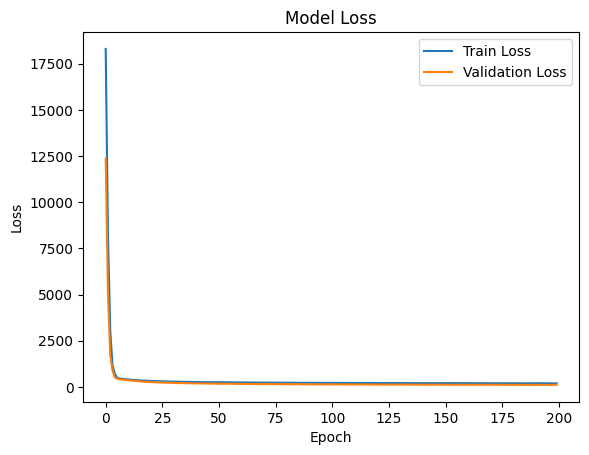

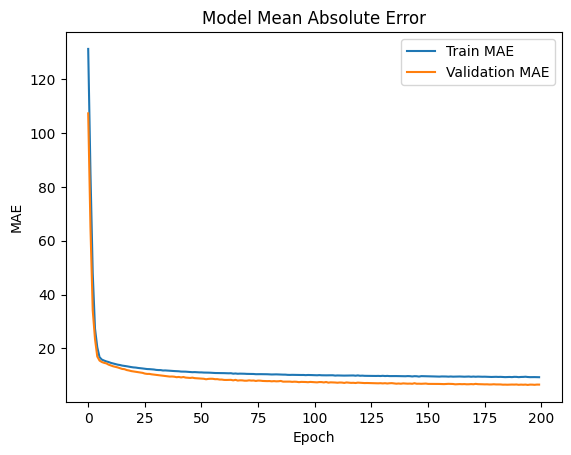

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
data_path = 'ipl_data.csv'  # Replace with your file path
ipl_data = pd.read_csv(data_path)
data = ipl_data.drop(['mid', 'date', 'batsman', 'bowler'], axis=1)

# Encode categorical variables
label_encoders = {}
for col in ['venue', 'bat_team', 'bowl_team']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target variable
X = data.drop('total', axis=1)
y = data['total']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Dense model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='sigmoid'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mape'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae, mape = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")
print(f"Test MAPE: {mape}%")
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")

# Make predictions
predictions = model.predict(X_test)

# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()
